# Stock Price Prediction
## For Tata Global Beverage
###  By Shreya Shukla

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [29]:
df=pd.read_csv(r"C:\Users\Hp\Downloads\NSE-Tata-Global-Beverages-Limited\NSE-Tata-Global-Beverages-Limited.csv")
dataset_train=data.iloc[0:930,1:2]
dataset_test=data.iloc[930:,1:2]
training_set = data.iloc[0:930, 3:4].values
testing_set=data.iloc[930:,3:4].values

In [30]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [39]:
df.isnull().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


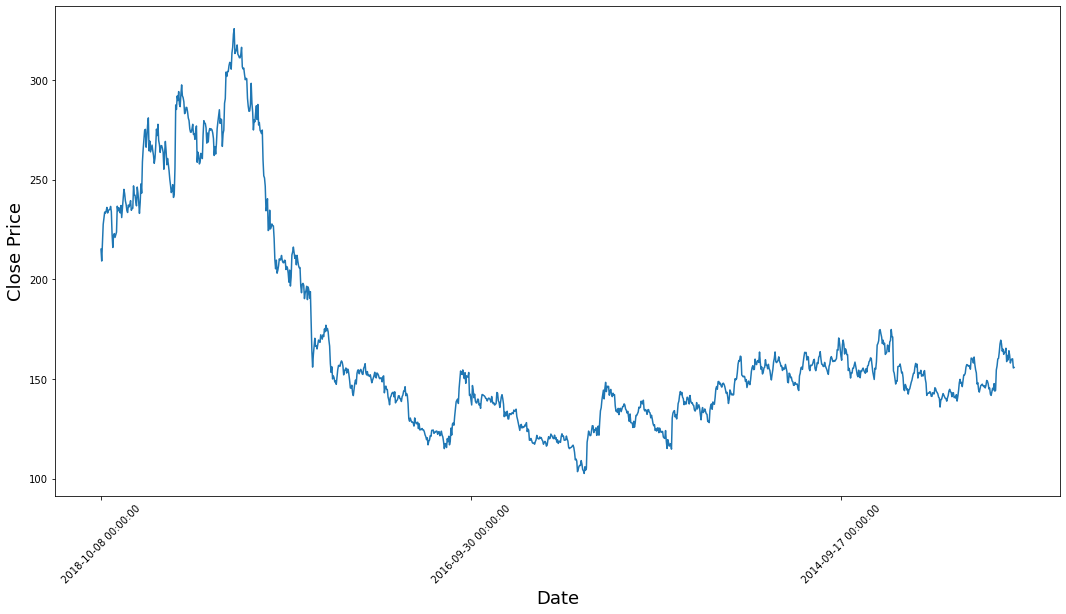

In [77]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(data['Close']))
plt.xticks(range(0,df.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [49]:
df.rolling(7).mean().head(20)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,225.950000,230.500000,219.571429,223.935714,224.007143,3.040937e+06,6822.042857
7,230.521429,233.035714,223.235714,226.650000,226.735714,2.697903e+06,6134.295714
8,232.850000,235.628571,226.964286,230.364286,230.578571,2.530739e+06,5862.415714
9,234.285714,237.257143,229.050000,232.757143,232.735714,2.772843e+06,6460.095714


<AxesSubplot:>

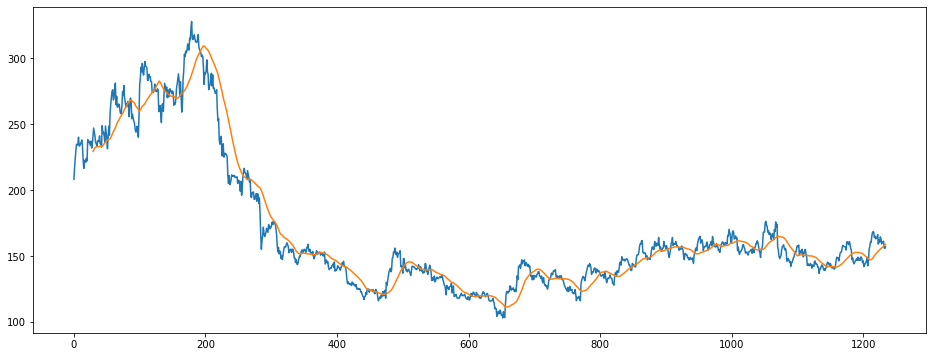

In [51]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()

In [70]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
len(training_set_scaled)
X_train = []
y_train = []
for i in range(10,930):
    X_train.append(training_set_scaled[i-10:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [68]:
pip install tensorflow

  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached grpcio-1.39.0-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached google_auth_oauthlib-0.4.5-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Attempting uninstall: h5py
    Found existing i

In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 75, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 75))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
15/15 [==============================] - 3s 23ms/step - loss: 0.1415
Epoch 2/200
15/15 [==============================] - 0s 21ms/step - loss: 0.0258
Epoch 3/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0185
Epoch 4/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0136
Epoch 5/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0112
Epoch 6/200
15/15 [==============================] - 0s 23ms/step - loss: 0.0103
Epoch 7/200
15/15 [==============================] - 0s 23ms/step - loss: 0.0099
Epoch 8/200
15/15 [==============================] - 0s 21ms/step - loss: 0.0098
Epoch 9/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0095
Epoch 10/200
15/15 [==============================] - 0s 21ms/step - loss: 0.0099
Epoch 11/200
15/15 [==============================] - 0s 21ms/step - loss: 0.0097
Epoch 12/200
15/15 [==============================] - 0s 22ms/step - loss: 0.0093
Epoch 13/200
15/15 [=====

In [75]:
real_stock_price = testing_set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10,305):
    X_test.append(inputs[i-10:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

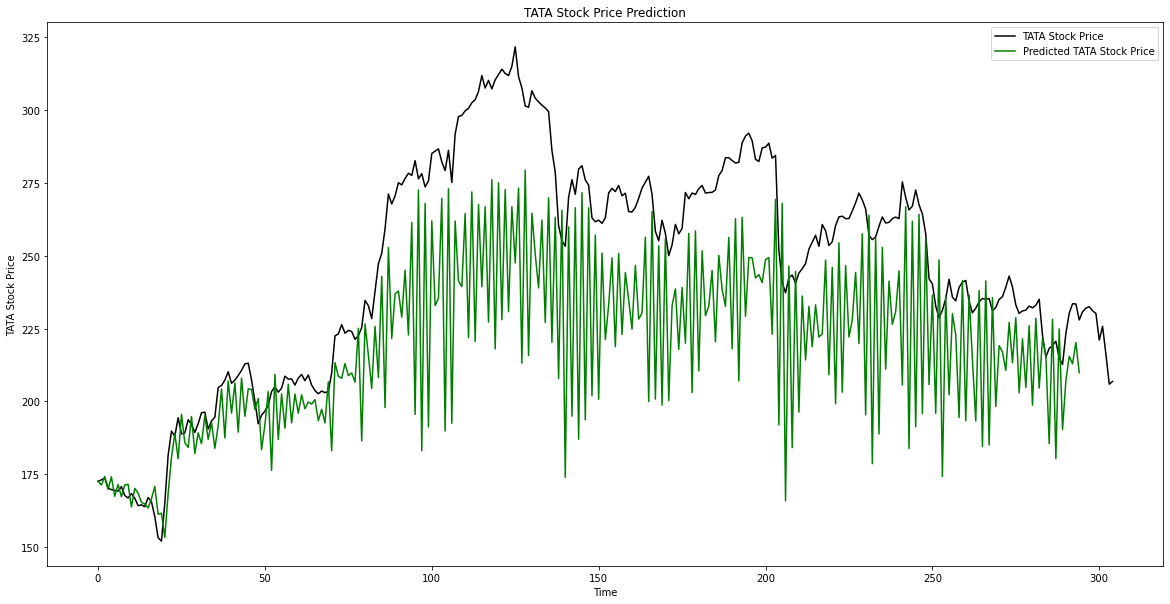

In [76]:

plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()